## Metody Nieparametryczne w Statystyce
# Zadanie 4
Za pomocą odpowiednich symulacji zbadać wpływ liczby klas (na które dzielone są dane) odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd I rodzaju) w teście 𝜒2 w przypadku weryfikacji zgodności z rozkładem 𝜒2 o różnych stopniach swobody, tzn. generować dane pochodzące z rozkładu 𝜒2 o 𝑘 stopniach swobody i weryfikować hipotezę, że dane mają rozkład 𝜒2 o 𝑘 st. swobody.
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek

In [2]:
import numpy as np, pandas as pd
from scipy.stats import chisquare, chi2
import matplotlib.pyplot as plt

# wyciszenie ostrzeżeń dla testu chi kwadrat 
# który zwraca uwagę na to, że w niektórych przedziałach nie ma obserwacji
import warnings
warnings.filterwarnings('ignore')

2. Badanie wpływu liczby klas na odsetek odrzuceń prawdziwej hipotezy głównej (df bazowe - 3).

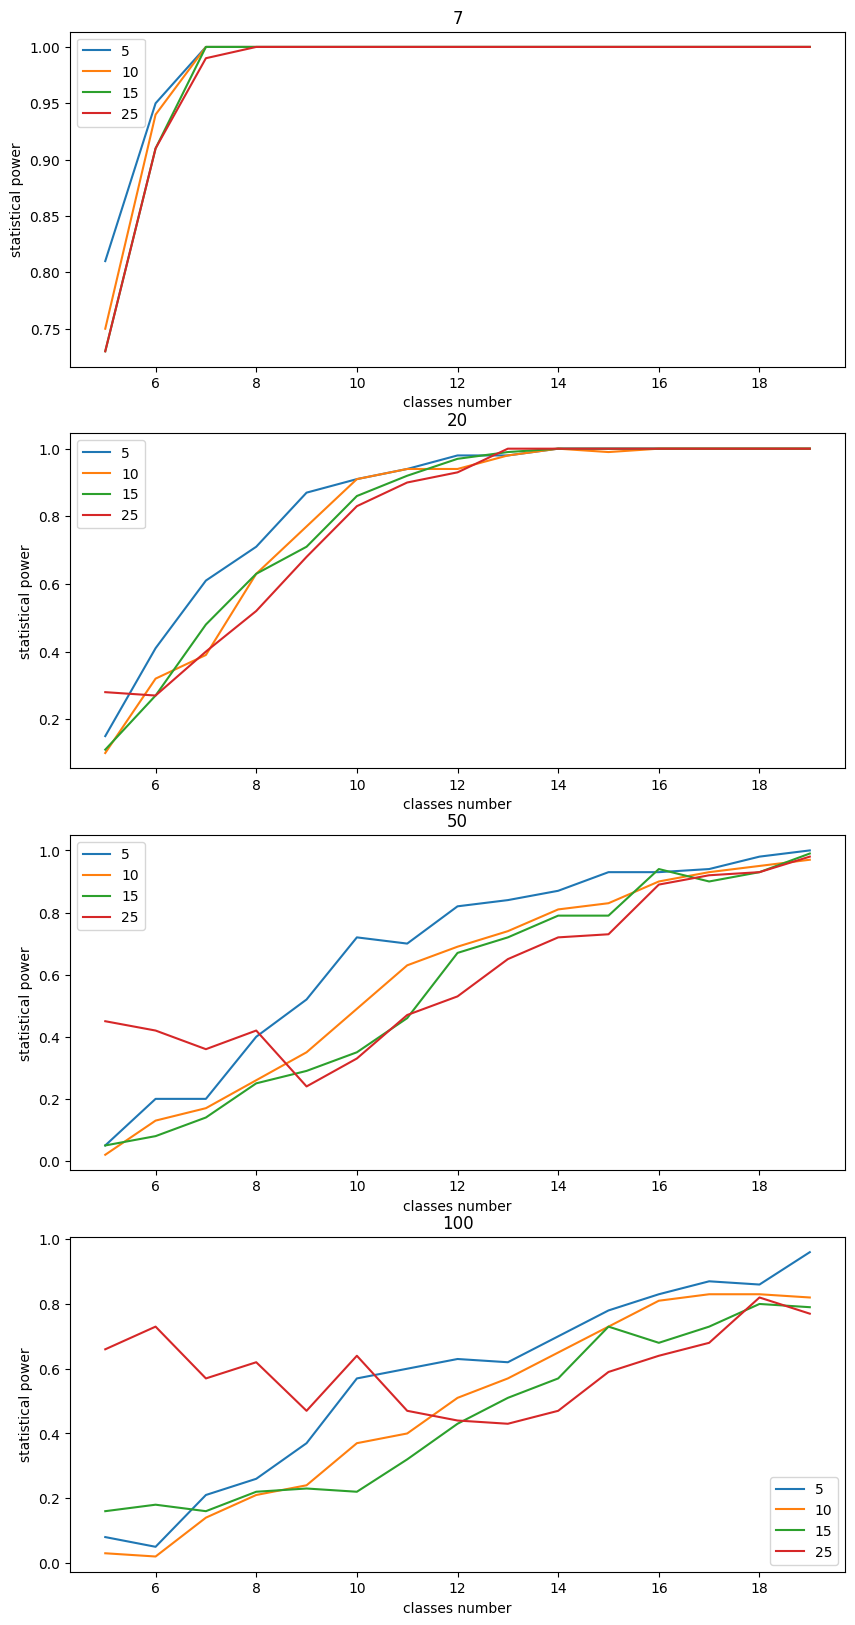

In [5]:
# przygotowywanie wykresu o czterech podwykresach
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 20))

#generowanie czterech wykresów dla różnych liczb danych w próbce = 7, 20, 50, 100
for idx, n in enumerate([7, 20, 50, 100]):
    results = pd.DataFrame(columns=["5", "10", "15", "25"])
    buf = []

    for c in range (5, 20):
        for i in range (0, 100):
            for df in [5, 10, 15, 25]:
                #generowanie dwóch wektorów liczbowych:
                #  - regularnego, oddającego kształt rozkładu chi-kwadrat o długości odpowiadającej liczbie klas c i df stopniach swobody
                #  - losowego, z histogramu stworzonego na podstawie losowej próbki z rozkładu chi kwadrat o df stopniach swobody
                x = chi2.pdf(np.arange(0, 20, 20 / c), df)
                xdf = np.histogram(np.random.chisquare(df, n), bins=c)[0]

                #obliczanie częstości występowania wartości w wektorach 
                x = x / np.sum(x)   
                xdf = xdf / np.sum(xdf)
                
                #test chi-kwadrat na podstawie obliczonych częstości
                buf.append(chisquare(x, xdf)[1] < .05)

        results.loc[c] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
        buf.clear()
    results.plot(xlabel="classes number", ylabel="statistical power", title=n, ax=axes[idx])

Dla coraz większej próbki odsetek odrzuceń prawdziwej hipotezy zerowej zmniejsza się, ponieważ dla większej ilości danych obliczenia są dokładniejsze i obarczone mniejszą niepewnością. W każdym przypadku, niezależnie od liczby danych w próbce odsetek odrzuceń hipotezy głównej wzrasta wraz z liczbą klas.